In [1]:
from pandas import read_csv, to_datetime, concat
from quandl import get
from matplotlib import pyplot, style
from numpy import array
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split as ttsplit
from sklearn.linear_model import LinearRegression as lr

In [2]:
style.use("fivethirtyeight")

In [3]:
# carregar o primeiro dataframe
key = open("../key").read()[:-1]
df1 = get("XFRA/SES", authtoken = key)

# carregar o segundo dataframe
df2 = read_csv("XRPBTC.csv")
df2.set_index("Date", inplace=True)
df2.index = to_datetime(df2.index)

In [4]:
# criar um terceiro dataframe apenas com as colunas Open, High, Low e Close
df3 = df1[["Open", "High", "Low", "Close"]]
df3.corr()

,Open,High,Low,Close
Open,1.000000,0.999487,0.999566,0.999128
High,0.999487,1.000000,0.999192,0.999654
Low,0.999566,0.999192,1.000000,0.999523
Close,0.999128,0.999654,0.999523,1.000000


In [5]:
# adaptar o segundo dataframe para criar um quarto dataframe
df2.rename(columns = { "Mid" : "Open", "Last" : "Close" }, inplace = True)
df4 = df2[["Open", "Close", "Low", "High"]]

# somar o quarto e quinto dataframe
df5 = concat([df3, df4], sort = False)
df5.tail(5)

,Open,High,Low,Close
Date,,,,
2017-05-23,0.000145,0.000159,0.000130,0.000144
2017-05-22,0.000141,0.000165,0.000115,0.000141
2017-05-21,0.000163,0.000178,0.000160,0.000164
2017-05-20,0.000168,0.000189,0.000147,0.000168
2017-05-19,0.000164,0.000200,0.000130,0.000169


In [6]:
# criar dois novos dataframes, um com o desvio padrão e outro com a média da coluna Open
mean = df1["Open"].rolling(30).mean()
std_dev = df1["Open"].rolling(30).std()

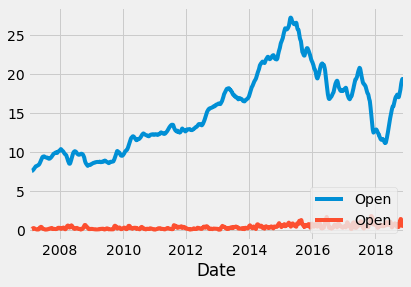

In [7]:
# plotar os gráficos em paralelo do valor da média e o desvio padrão do Open
mean.plot()
std_dev.plot()
pyplot.legend(loc = 4)
pyplot.show()

In [79]:
def label(open_v, high_v):
    if (high_v - open_v) > (high_v / 200):
        return 1
    else:
        return 0

In [80]:
df5["label"] = list(map(label, df5["Open"], df5["High"]))

In [92]:
df5.fillna(0, inplace = True)
x = array(df5.drop(["label"], 1))
y = array(df5["label"])
x = preprocessing.scale(x)
x_train, x_test, y_train, y_test = ttsplit(x, y, test_size = 0.25)

In [93]:
lr_signal = lr(n_jobs = 10)
lr_signal.fit(x_train, y_train)
lr_signal.score(x_test, y_test)

0.4144663395734267

In [94]:
buy_signal_svm = svm.SVR(gamma = "scale")
buy_signal_svm.fit(x_train, y_train)
buy_signal_svm.score(x_test, y_test)

0.878011350770595

In [117]:
# Otimização
df_lr = df5
df_lr["oxh"] = df_lr["High"] - df_lr["Open"]
df_lr["half"] = df_lr["High"] / 200
xlr_tr, xlr_ts, ylr_tr, ylr_ts = ttsplit(preprocessing.scale(array(df_lr.drop(["label"], 1)))
                                        , array(df_lr["label"])
                                        , test_size = 0.25)

In [118]:
# Regressão Linear
lr_signal = lr(n_jobs = 10)
lr_signal.fit(xlr_tr, ylr_tr)
lr_signal.score(xlr_ts, ylr_ts)

0.47211365635673175

In [119]:
# SVM
buy_signal_svm = svm.SVR(gamma = "scale")
buy_signal_svm.fit(xlr_tr, ylr_tr)
buy_signal_svm.score(xlr_ts, ylr_ts)

0.8946059868197602